In [64]:
from mido import MidiFile

def read_midi_file(file_path):
    mid= MidiFile(r'C:\Users\golja\Desktop\file\midi.mid')
    for i,track in enumerate(mid.tracks):
        print(f'track {i}: {track.name}')
        for msg in track:
            print(msg)

In [68]:
import mido
import pygame

# Load a MIDI file
mid = mido.MidiFile(r'C:\Users\golja\Desktop\file\midi.mid')

# Initialize pygame mixer
pygame.mixer.init()

# Set the tempo and resolution
tempo = 500000  # Assuming the default tempo is 500000 microseconds per beat
resolution = 480  # MIDI standard resolution

# Iterate through the MIDI file and play the notes
for msg in mid.play():
    if msg.type == 'note_on':
        # Calculate the duration in seconds based on tempo, resolution, and time of the message
        time_in_seconds = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)
        
        pygame.mixer.music.set_volume(0.5)  # Adjust volume if needed
        
        # Play the note with a fixed duration
        pygame.mixer.music.load(r'C:\Users\golja\Desktop\file\midi.mid')  # Replace with your sound file
        pygame.mixer.music.play()
        
        # Wait for the duration of the note before proceeding to the next message
        pygame.time.wait(int(time_in_seconds * 1000))

## Q2

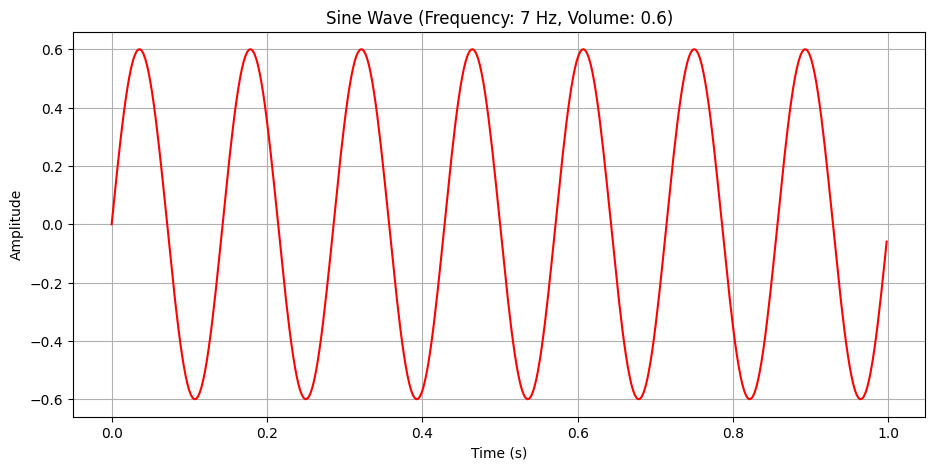

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Oscillator:
    def __init__(self, frequency, sampling_rate, volume):
        self.frequency = frequency
        self.sampling_rate = sampling_rate
        self.volume = volume
        self.phase = 0

    def generate_sine_wave(self, duration):
        num_samples = int(duration * self.sampling_rate)
        time = np.linspace(0, duration, num_samples, endpoint=False)
        sine_wave = self.volume * np.sin(2 * np.pi * self.frequency * time)
        return time, sine_wave
    
frequency = 7  
sampling_rate = 441  
duration = 1  
volume = 0.6  
oscillator = Oscillator(frequency, sampling_rate, volume)
time, sine_wave = oscillator.generate_sine_wave(duration)

plt.figure(figsize=(11, 5))  
plt.plot(time, sine_wave,color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave (Frequency: {} Hz, Volume: {})'.format(frequency, volume))
plt.grid(True)
plt.show()

## Wave Sawtooth

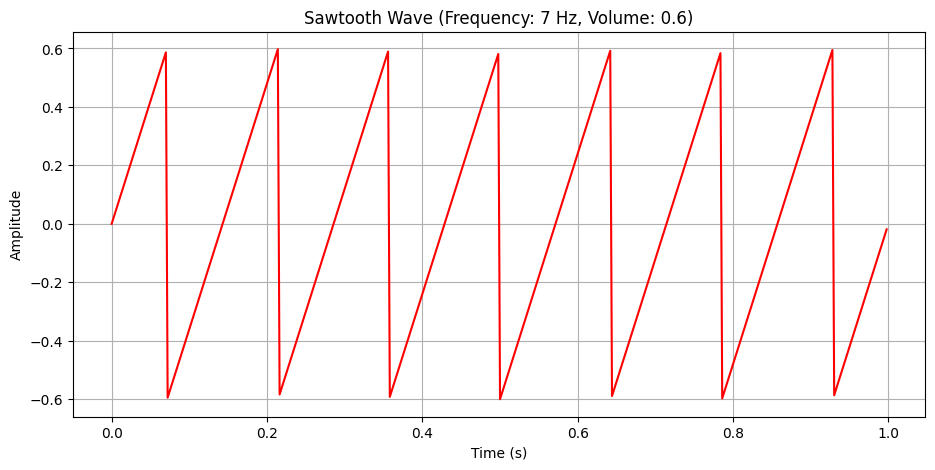

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Oscillator:
    def __init__(self, frequency, sampling_rate, volume):
        self.frequency = frequency
        self.sampling_rate = sampling_rate
        self.volume = volume
        self.phase = 0

    def generate_sawtooth_wave(self, duration):
        num_samples = int(duration * self.sampling_rate)
        time = np.linspace(0, duration, num_samples, endpoint=False)
        sawtooth_wave = self.volume * (2 * (self.frequency * time - np.floor(self.frequency * time + 0.5)))
        return time, sawtooth_wave

frequency = 7 
sampling_rate = 444  
duration = 1  
volume = 0.6  
oscillator = Oscillator(frequency, sampling_rate, volume)
time, sawtooth_wave = oscillator.generate_sawtooth_wave(duration)

plt.figure(figsize=(11, 5))  
plt.plot(time, sawtooth_wave,color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sawtooth Wave (Frequency: {} Hz, Volume: {})'.format(frequency, volume))
plt.grid(True)
plt.show()

## Wave Triangular

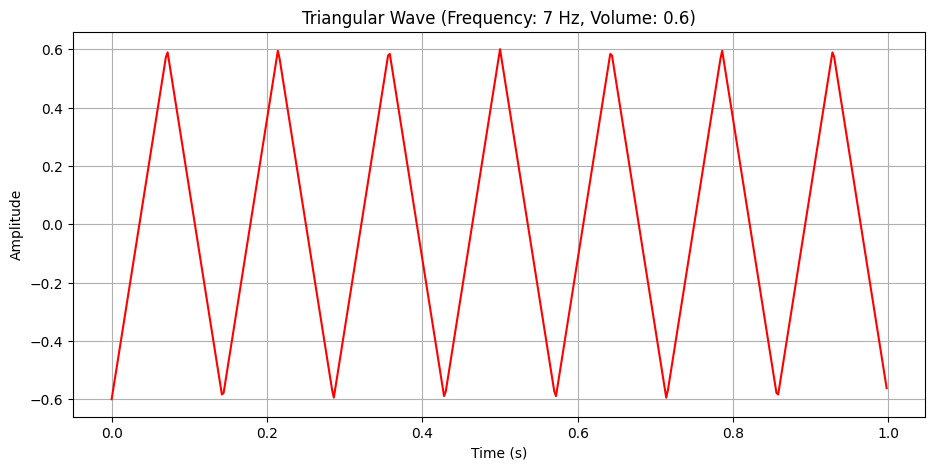

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Oscillator:
    def __init__(self, frequency, sampling_rate, volume):
        self.frequency = frequency
        self.sampling_rate = sampling_rate
        self.volume = volume
        self.phase = 0

    def generate_triangular_wave(self, duration):
        num_samples = int(duration * self.sampling_rate)
        time = np.linspace(0, duration, num_samples, endpoint=False)
        triangular_wave = self.volume * (2 * np.abs(2 * (time * self.frequency - np.floor(time * self.frequency + 0.5))) - 1)
        return time, triangular_wave

frequency = 7
sampling_rate = 444 
duration = 1  
volume = 0.6 
oscillator = Oscillator(frequency, sampling_rate, volume)
time, triangular_wave = oscillator.generate_triangular_wave(duration)

plt.figure(figsize=(11, 5))  
plt.plot(time, triangular_wave,color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Triangular Wave (Frequency: {} Hz, Volume: {})'.format(frequency, volume))
plt.grid(True)
plt.show()

## Wave Square

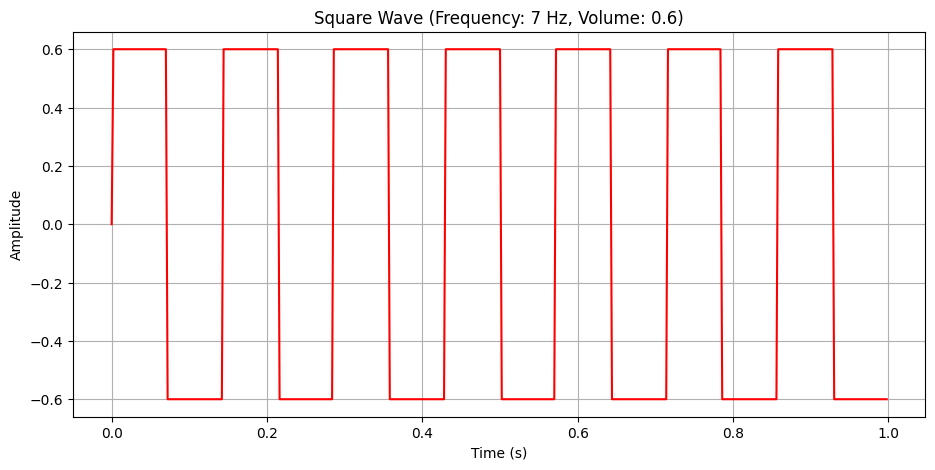

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Oscillator:
    def __init__(self, frequency, sampling_rate, volume):
        self.frequency = frequency
        self.sampling_rate = sampling_rate
        self.volume = volume
        self.phase = 0

    def generate_square_wave(self, duration):
        num_samples = int(duration * self.sampling_rate)
        time = np.linspace(0, duration, num_samples, endpoint=False)
        square_wave = self.volume * np.sign(np.sin(2 * np.pi * self.frequency * time))
        return time, square_wave

frequency = 7  
sampling_rate = 444  
duration = 1  
volume =0.6  

oscillator = Oscillator(frequency, sampling_rate, volume)
time, square_wave = oscillator.generate_square_wave(duration)
plt.figure(figsize=(11, 5)) 
plt.plot(time, square_wave,color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Square Wave (Frequency: {} Hz, Volume: {})'.format(frequency, volume))
plt.grid(True)
plt.show()

## Sawtooth Wave with VCF

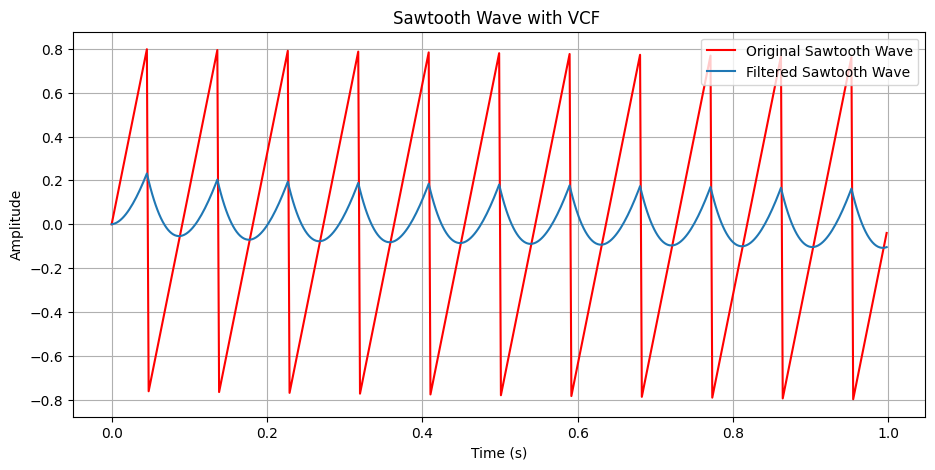

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class VCF:
    def __init__(self, cutoff_freq, resonance):
        self.cutoff_freq = cutoff_freq
        self.resonance = resonance

    def apply_filter(self, signal, sampling_rate):
        dt = 1.0 / sampling_rate
        RC = 1.0 / (2 * np.pi * self.cutoff_freq)
        alpha = RC / (RC + dt)
        
        output = np.zeros_like(signal)
        prev_output = 0
        
        for i in range(len(signal)):
            output[i] = alpha * (signal[i] - prev_output) + prev_output
            prev_output = output[i]
        
        return output

class Oscillator:
    def __init__(self, frequency, sampling_rate, volume):
        self.frequency = frequency
        self.sampling_rate = sampling_rate
        self.volume = volume
        self.phase = 0

    def generate_sawtooth_wave(self, duration):
        num_samples = int(duration * self.sampling_rate)
        time = np.linspace(0, duration, num_samples, endpoint=False)
        sawtooth_wave = self.volume * (2 * (self.frequency * time - np.floor(self.frequency * time + 0.5)))
        return time, sawtooth_wave

frequency = 11  
sampling_rate = 441 
duration = 1  
volume = 0.8  
cutoff_freq = 2000  
resonance = 0.5  

oscillator = Oscillator(frequency, sampling_rate, volume)
time, sawtooth_wave = oscillator.generate_sawtooth_wave(duration)

vcf = VCF(cutoff_freq, resonance)
filtered_wave = vcf.apply_filter(sawtooth_wave, sampling_rate)

plt.figure(figsize=(11, 5))  
plt.plot(time, sawtooth_wave, label='Original Sawtooth Wave',color='red')
plt.plot(time, filtered_wave, label='Filtered Sawtooth Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sawtooth Wave with VCF '.format(cutoff_freq, resonance))
plt.legend()
plt.grid(True)
plt.show()

## square Wave with VCF

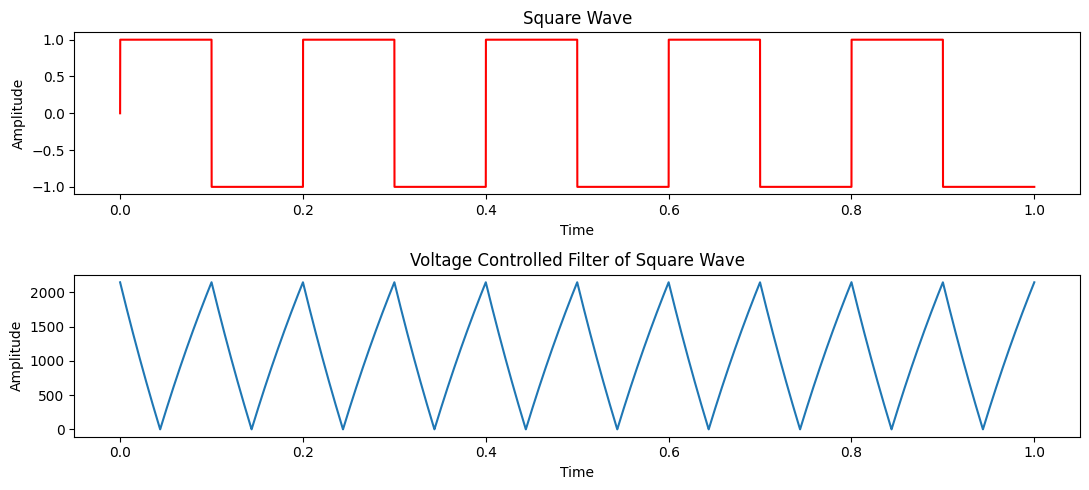

In [20]:
import numpy as np
import matplotlib.pyplot as plt
frequency = 5     
sampling_rate = 44100  

duration = 1 
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
square_wave = np.sign(np.sin(2 * np.pi * frequency * t))
cutoff_frequency = 5  
vcf = np.abs(np.fft.ifft(np.fft.fft(square_wave) * np.fft.fft(np.exp(-t * cutoff_frequency))))

plt.figure(figsize=(11, 5))  
plt.subplot(2, 1, 1)
plt.plot(t, square_wave,color='red')
plt.title('Square Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, vcf)
plt.title('Voltage Controlled Filter of Square Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Triangular Wave with VCF

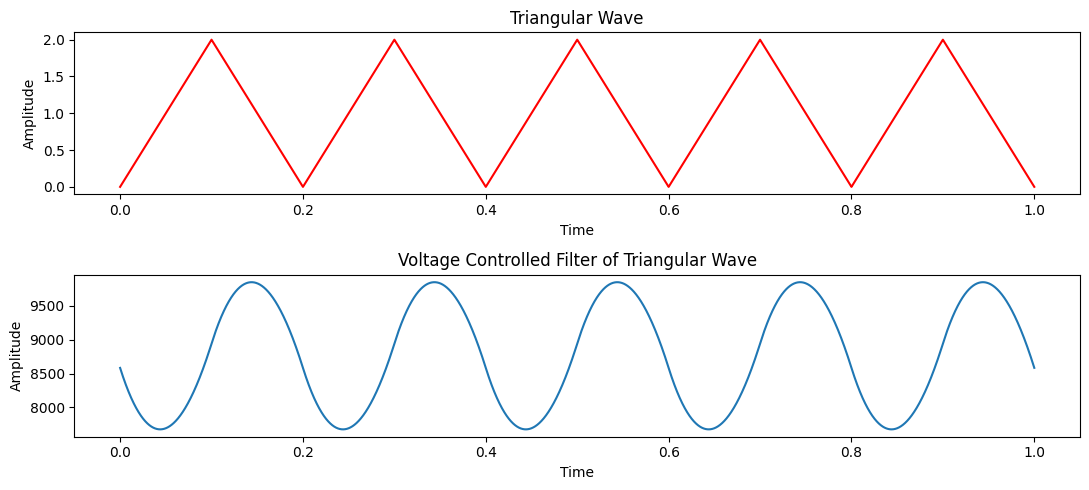

In [22]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 5  
sampling_rate = 44100
duration = 1  
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

triangular_wave = 2 * np.abs(2 * (t * frequency - np.floor(t * frequency + 0.5)))
vcf = np.abs(np.fft.ifft(np.fft.fft(triangular_wave) * np.fft.fft(np.exp(-t * cutoff_frequency))))

plt.figure(figsize=(11, 5))  
plt.subplot(2, 1, 1)
plt.plot(t, triangular_wave,color='red')
plt.title('Triangular Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, vcf)
plt.title('Voltage Controlled Filter of Triangular Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Sin Wave with VCF

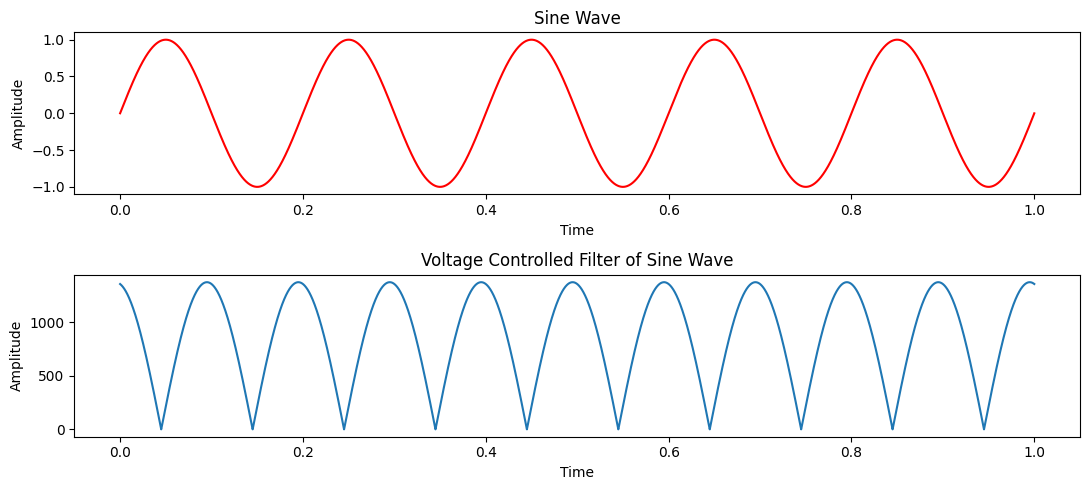

In [25]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 5  
sampling_rate = 44100  
duration = 1  
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)
cutoff_frequency = 5  
vcf = np.abs(np.fft.ifft(np.fft.fft(sine_wave) * np.fft.fft(np.exp(-t * cutoff_frequency))))

plt.figure(figsize=(11, 5))  
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave,color='red')
plt.title('Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, vcf)
plt.title('Voltage Controlled Filter of Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Square Wave with LFO

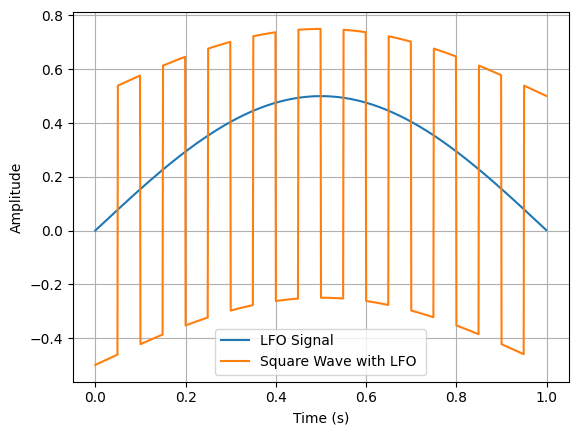

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_square_wave(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    wave = amplitude * (2 * (np.floor(2 * freq * t) % 2) - 1)
    return wave

def apply_volume_control(signal, volume):
    return signal * volume

def apply_vcf(signal, cutoff_freq):
    filtered_signal = np.convolve(signal, [1, -1], mode='same')
    return filtered_signal

def generate_lfo(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    lfo = amplitude * np.sin(2 * np.pi * freq * t)
    return lfo

freq = 10
amplitude = 1
duration = 1
sampling_rate = 1000
volume = 0.5
cutoff_freq = 100
lfo_freq = 0.5
lfo_amplitude = 0.5

square_wave = generate_square_wave(freq, amplitude, duration, sampling_rate)
lfo_signal = generate_lfo(lfo_freq, lfo_amplitude, duration, sampling_rate)
modulated_wave = square_wave + lfo_signal
modulated_wave_volume = apply_volume_control(modulated_wave, volume)
modulated_wave_vcf = apply_vcf(modulated_wave_volume, cutoff_freq)

plt.figure()
plt.plot(np.arange(len(lfo_signal))/sampling_rate, lfo_signal, label='LFO Signal')
plt.plot(np.arange(len(modulated_wave))/sampling_rate, modulated_wave_volume, label='Square Wave with LFO ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Triangular Wave with LFO

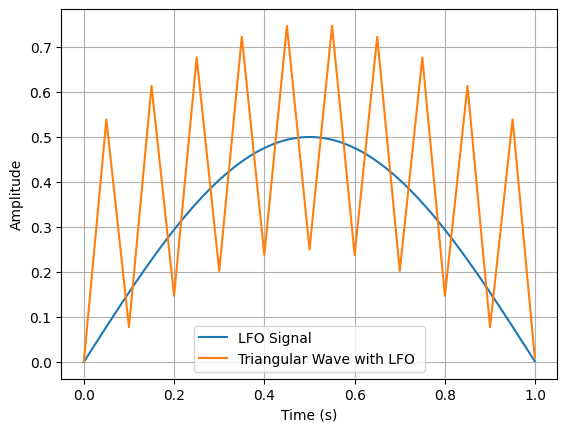

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangular_wave(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    wave = amplitude * np.abs(2 * (t * freq - np.floor(t * freq + 0.5)))
    return wave

def apply_volume_control(signal, volume):
    return signal * volume

def apply_vcf(signal, cutoff_freq):
    filtered_signal = np.convolve(signal, [1, -1], mode='same')
    return filtered_signal

def generate_lfo(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    lfo = amplitude * np.sin(2 * np.pi * freq * t)
    return lfo

freq = 10 
amplitude = 1 
duration = 1 
sampling_rate = 1000 
volume = 0.5 
cutoff_freq = 100 
lfo_freq = 0.5 
lfo_amplitude = 0.5 

triangular_wave = generate_triangular_wave(freq, amplitude, duration, sampling_rate)
lfo_signal = generate_lfo(lfo_freq, lfo_amplitude, duration, sampling_rate)
modulated_wave = triangular_wave + lfo_signal
modulated_wave_volume = apply_volume_control(modulated_wave, volume)
modulated_wave_vcf = apply_vcf(modulated_wave_volume, cutoff_freq)

plt.figure()
plt.plot(np.arange(len(lfo_signal))/sampling_rate, lfo_signal, label='LFO Signal')
plt.plot(np.arange(len(modulated_wave))/sampling_rate, modulated_wave_volume, label='Triangular Wave with LFO ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Sawtooth Wave with LFO

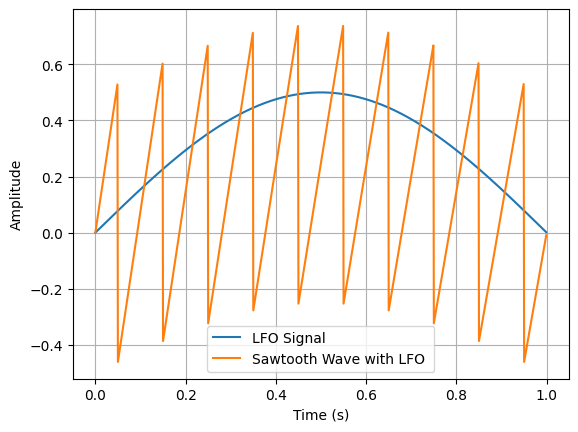

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sawtooth_wave(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    wave = amplitude * (2 * (t * freq - np.floor(t * freq + 0.5)))
    return wave

def apply_volume_control(signal, volume):
    return signal * volume

def apply_vcf(signal, cutoff_freq):
    filtered_signal = np.convolve(signal, [1, -1], mode='same')
    return filtered_signal

def generate_lfo(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    lfo = amplitude * np.sin(2 * np.pi * freq * t)
    return lfo

freq = 10
amplitude = 1
duration = 1
sampling_rate = 1000
volume = 0.5
cutoff_freq = 100
lfo_freq = 0.5
lfo_amplitude = 0.5

sawtooth_wave = generate_sawtooth_wave(freq, amplitude, duration, sampling_rate)
lfo_signal = generate_lfo(lfo_freq, lfo_amplitude, duration, sampling_rate)
modulated_wave = sawtooth_wave + lfo_signal
modulated_wave_volume = apply_volume_control(modulated_wave, volume)
modulated_wave_vcf = apply_vcf(modulated_wave_volume, cutoff_freq)

plt.figure()
plt.plot(np.arange(len(lfo_signal))/sampling_rate, lfo_signal, label='LFO Signal')
plt.plot(np.arange(len(modulated_wave))/sampling_rate, modulated_wave_volume, label='Sawtooth Wave with LFO ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Sin Wave with LFO

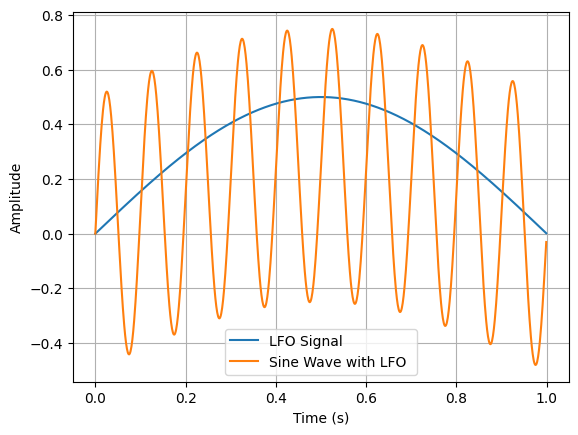

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    return wave

def apply_volume_control(signal, volume):
    return signal * volume

def apply_vcf(signal, cutoff_freq):
    filtered_signal = np.convolve(signal, [1, -1], mode='same')
    return filtered_signal

def generate_lfo(freq, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate*duration), endpoint=False)
    lfo = amplitude * np.sin(2 * np.pi * freq * t)
    return lfo

freq = 10
amplitude = 1
duration = 1
sampling_rate = 1000
volume = 0.5
cutoff_freq = 100
lfo_freq = 0.5
lfo_amplitude = 0.5

sine_wave = generate_sine_wave(freq, amplitude, duration, sampling_rate)
lfo_signal = generate_lfo(lfo_freq, lfo_amplitude, duration, sampling_rate)
modulated_wave = sine_wave + lfo_signal
modulated_wave_volume = apply_volume_control(modulated_wave, volume)
modulated_wave_vcf = apply_vcf(modulated_wave_volume, cutoff_freq)

plt.figure()
plt.plot(np.arange(len(lfo_signal))/sampling_rate, lfo_signal, label='LFO Signal')
plt.plot(np.arange(len(modulated_wave))/sampling_rate, modulated_wave_volume, label='Sine Wave with LFO ')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## detuning


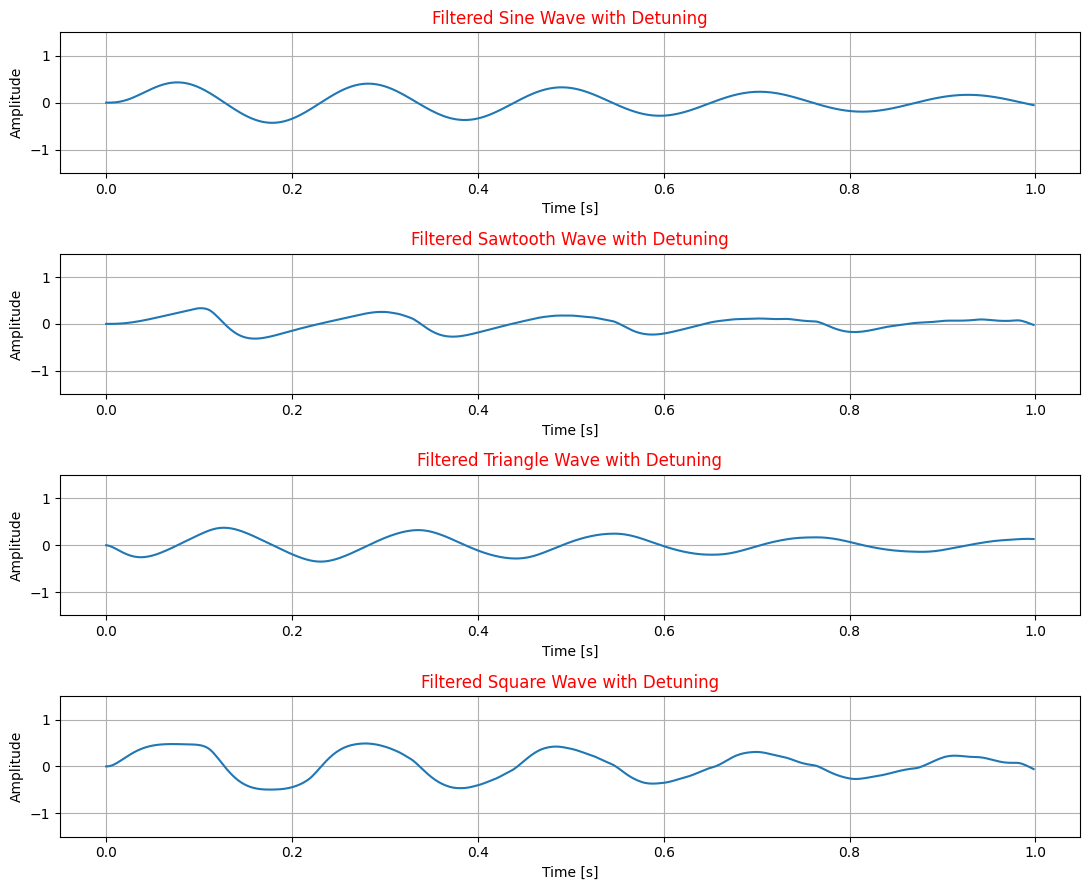

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter


class Oscillator:
    def __init__(self, shape='sine', phase=0, frequency=5, volume=1, detuning_factor=0, num_detuned=5):
        self.shape = shape
        self.phase = phase
        self.frequency = frequency
        self.volume = volume
        self.detuning_factor = detuning_factor
        self.num_detuned = num_detuned
        
    def generate_wave(self, duration=1, fs=500):
        t = np.linspace(0, duration, int(fs*duration), endpoint=False)
        base_freq = self.frequency
        wave = np.zeros_like(t)
        for i in range(self.num_detuned):
            detuned_freq = base_freq + self.detuning_factor * (i - self.num_detuned // 2)
            if self.shape == 'sine':
                partial_wave = np.sin(2 * np.pi * detuned_freq * t + self.phase)
            elif self.shape == 'sawtooth':
                partial_wave = 2 * (t * detuned_freq - np.floor(0.5 + t * detuned_freq))
            elif self.shape == 'triangle':
                partial_wave = 2 * np.abs(2 * (t * detuned_freq - np.floor(0.5 + t * detuned_freq))) - 1
            elif self.shape == 'square':
                partial_wave = np.sign(np.sin(2 * np.pi * detuned_freq * t + self.phase))
            else:
                raise ValueError("Shape not recognized. Use 'sine', 'sawtooth', 'triangle', or 'square'.")
                
            amplitude = self.volume / (i + 1)
            wave += amplitude * partial_wave
        return wave / self.num_detuned

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

osc_sine = Oscillator(shape='sine', phase=0, frequency=5, volume=1, detuning_factor=0.2, num_detuned=5)
osc_saw = Oscillator(shape='sawtooth', phase=0, frequency=5, volume=1, detuning_factor=0.2, num_detuned=5)
osc_triangle = Oscillator(shape='triangle', phase=0, frequency=5, volume=1, detuning_factor=0.2, num_detuned=5)
osc_square = Oscillator(shape='square', phase=0, frequency=5, volume=1, detuning_factor=0.2, num_detuned=5)
duration = 1
fs = 500

wave_sine = osc_sine.generate_wave(duration, fs)
wave_saw = osc_saw.generate_wave(duration, fs)
wave_triangle = osc_triangle.generate_wave(duration, fs)
wave_square = osc_square.generate_wave(duration, fs)
cutoff = 10 
order = 2

filtered_sine = butter_lowpass_filter(wave_sine, cutoff, fs, order)
filtered_saw = butter_lowpass_filter(wave_saw, cutoff, fs, order)
filtered_triangle = butter_lowpass_filter(wave_triangle, cutoff, fs, order)
filtered_square = butter_lowpass_filter(wave_square, cutoff, fs, order)

t = np.linspace(0, duration, int(fs*duration), endpoint=False)

fig, axs = plt.subplots(4, 1, figsize=(11, 9))

axs[0].plot(t, filtered_sine)
axs[0].set_title('Filtered Sine Wave with Detuning',color='red')
axs[0].set_ylim(-1.5, 1.5)
axs[0].grid(True)

axs[1].plot(t, filtered_saw)
axs[1].set_title('Filtered Sawtooth Wave with Detuning',color='red')
axs[1].set_ylim(-1.5, 1.5)
axs[1].grid(True)

axs[2].plot(t, filtered_triangle)
axs[2].set_title('Filtered Triangle Wave with Detuning',color='red')
axs[2].set_ylim(-1.5, 1.5)
axs[2].grid(True)

axs[3].plot(t, filtered_square)
axs[3].set_title('Filtered Square Wave with Detuning',color='red')
axs[3].set_ylim(-1.5, 1.5)
axs[3].grid(True)

for ax in axs:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [23]:
import numpy as np
from scipy.signal import butter, lfilter
import soundfile as sf

class Oscillator:
    def __init__(self, shape='sine', phase=0, frequency=5, volume=1, detuning_factor=0, num_detuned=5):
        self.shape = shape
        self.phase = phase
        self.frequency = frequency
        self.volume = volume
        self.detuning_factor = detuning_factor
        self.num_detuned = num_detuned
        
    def generate_wave(self, duration=1, fs=500):
        t = np.linspace(0, duration, int(fs*duration), endpoint=False)
        base_freq = self.frequency
        wave = np.zeros_like(t)
        for i in range(self.num_detuned):
            detuned_freq = base_freq + self.detuning_factor * (i - self.num_detuned // 2)
            if self.shape == 'sine':
                partial_wave = np.sin(2 * np.pi * detuned_freq * t + self.phase)
            elif self.shape == 'sawtooth':
                partial_wave = 2 * (t * detuned_freq - np.floor(0.5 + t * detuned_freq))
            elif self.shape == 'triangle':
                partial_wave = 2 * np.abs(2 * (t * detuned_freq - np.floor(0.5 + t * detuned_freq))) - 1
            elif self.shape == 'square':
                partial_wave = np.sign(np.sin(2 * np.pi * detuned_freq * t + self.phase))
            else:
                raise ValueError("Shape not recognized. Use 'sine', 'sawtooth', 'triangle', or 'square'.")
                
            amplitude = self.volume / (i + 1)
            wave += amplitude * partial_wave
        return wave / self.num_detuned

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Load your music data
music_data, fs = sf.read(r'C:\Users\golja\Desktop\file\music.wav')

# Extract information from your music data and use it in the Oscillator
# For example, you can use the frequency from the music data
max_frequency = np.max(music_data)  # Extract the maximum frequency from your music data
osc = Oscillator(shape='sine', frequency=141, volume=50, detuning_factor=3, num_detuned=5)

# Generate a wave with detuning using the extracted frequency
waveform = osc.generate_wave(duration=len(music_data)/fs, fs=fs)

# Apply a low-pass filter to the waveform
cutoff_freq = 100  # Adjust cutoff frequency as needed
filtered_waveform = butter_lowpass_filter(waveform, cutoff_freq, fs=fs)

# Play the generated waveform or store it for later use in music composition
# You can use libraries like sounddevice to play the generated waveforms
sf.write(r'C:\Users\golja\Desktop\file\music_detuning.wav', filtered_waveform, fs)

## push design 2-2-2

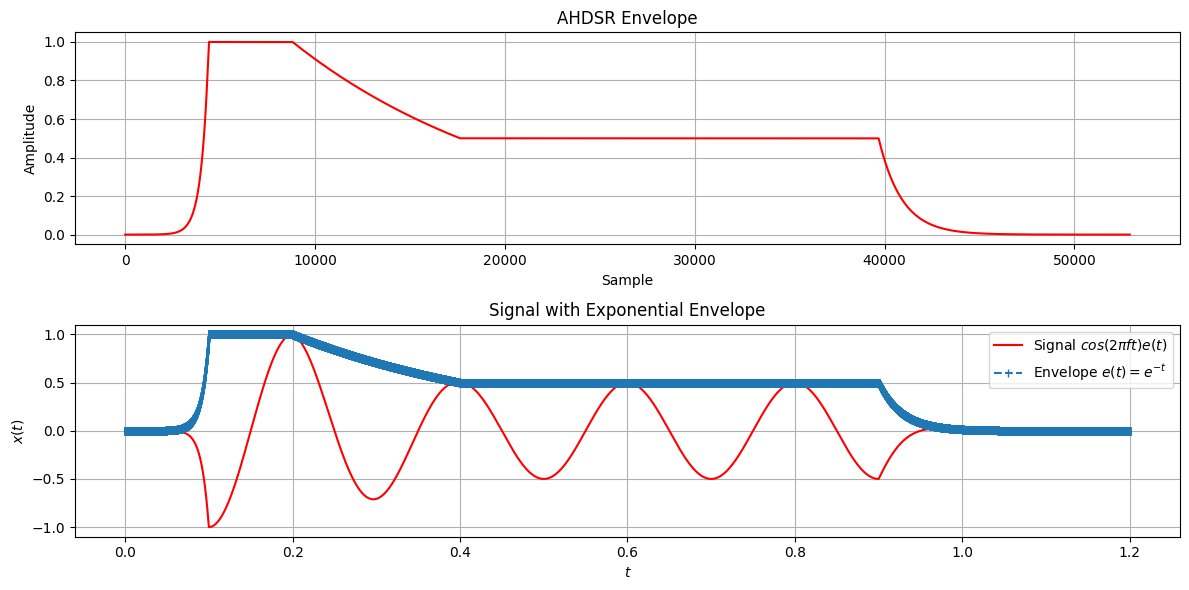

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_segment(start_level, end_level, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    segment = start_level * np.exp(np.log(end_level / start_level) * t / duration)
    return segment

def ahdsr_envelope(attack, hold, decay, sustain_level, sustain_duration, release, sample_rate=44100):
    attack_segment = exponential_segment(1e-5, 1, attack, sample_rate)
    hold_segment = np.ones(int(sample_rate * hold))
    decay_segment = exponential_segment(1, sustain_level, decay, sample_rate)
    sustain_segment = np.ones(int(sample_rate * sustain_duration)) * sustain_level
    release_segment = exponential_segment(sustain_level, 1e-5, release, sample_rate)
    envelope = np.concatenate((attack_segment, hold_segment, decay_segment, sustain_segment, release_segment))
    return envelope

attack = 0.1
hold = 0.1  
decay = 0.2  
sustain_level = 0.5  
sustain_duration = 0.5  
release = 0.3 
sample_rate = 44100  

envelope = ahdsr_envelope(attack, hold, decay, sustain_level, sustain_duration, release, sample_rate)
t = np.linspace(0, len(envelope) / sample_rate, len(envelope), endpoint=False)
frequency = 5 
signal = np.cos(2 * np.pi * frequency * t) * envelope

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(envelope,color='red')
plt.title('AHDSR Envelope')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, signal, 'r', label='Signal $cos(2\pi ft)e(t)$')
plt.plot(t, envelope, '|--', label='Envelope $e(t) = e^{-t}$')
plt.title('Signal with Exponential Envelope')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Q 2-3-1

## Saturation

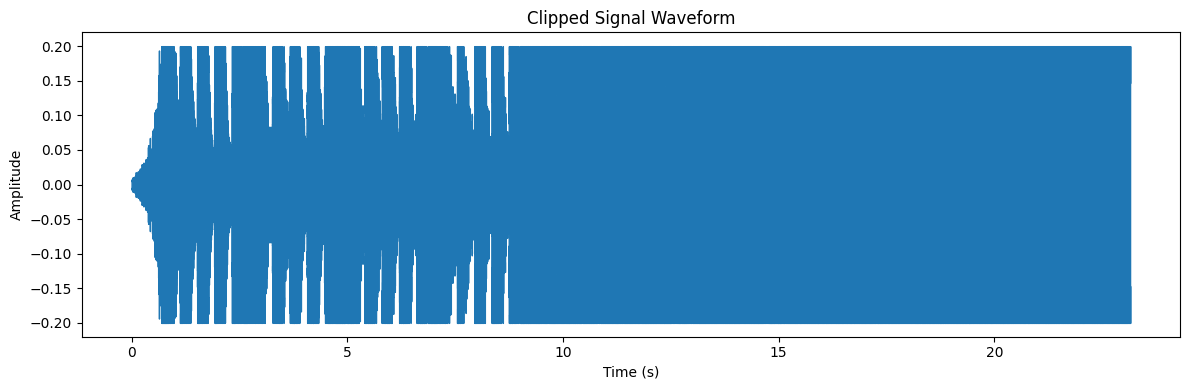

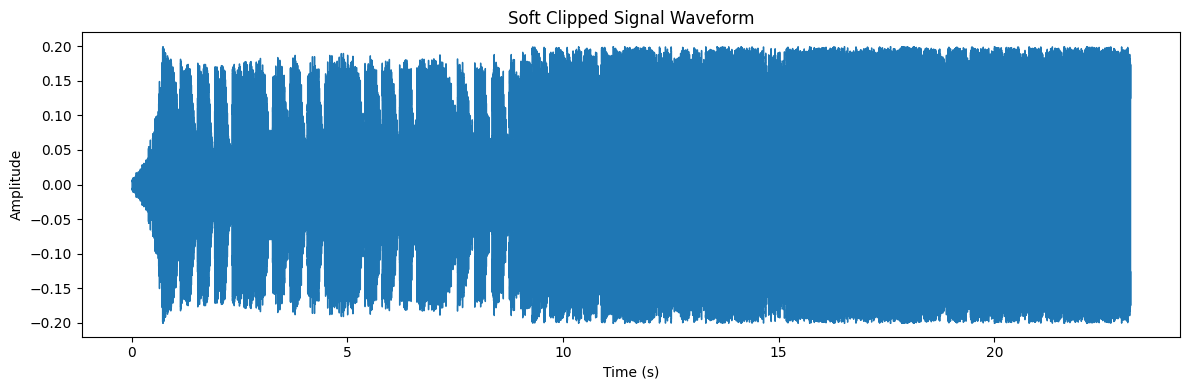

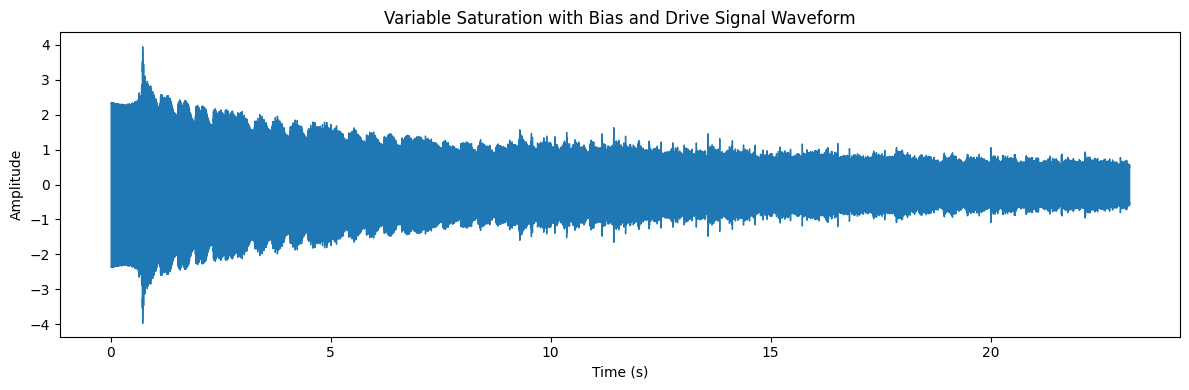

Audio file after variable saturation with bias and drive saved as: C:\Users\golja\Desktop\file\variable-clipped_music.wav
Audio file after soft clipping saturation saved as: C:\Users\golja\Desktop\file\variable-clipped_music.wav
Audio file after hard clipping saturation saved as: C:\Users\golja\Desktop\file\variable-clipped_music.wav


In [38]:
import os
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd

def play_audio(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    sd.play(y, sr)
    status = sd.wait()

def hard_clip_audio(audio_file, threshold):
    y, sr = librosa.load(audio_file, sr=None)

    # Apply hard clipping saturation
    clipped_y = np.clip(y, -threshold, threshold)

    # Define the save path for the clipped audio file
    save_dir, save_filename = os.path.split(audio_file)
    save_path = os.path.join(save_dir, "hard-clipped_" + save_filename)

    # Save the clipped audio to a new file
    sf.write(save_path, clipped_y, sr)

    # Plot the signal waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(clipped_y, sr=sr)
    plt.title('Clipped Signal Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    return save_path

# Example usage
audio_file = r'C:\Users\golja\Desktop\file\music.wav'
threshold = 0.2
clipped_audio_file = hard_clip_audio(audio_file, threshold)
def soft_clip_audio(audio_file, threshold):
    y, sr = librosa.load(audio_file, sr=None)
    
    # Apply soft clipping saturation
    clipped_y = np.tanh(y / threshold) * threshold
    
    # Define the path to save the clipped audio file
    save_dir, save_filename = os.path.split(audio_file)
    save_path = os.path.join(save_dir, "soft-clipped_" + save_filename)
    # Save the clipped audio to a new file
    sf.write(save_path, clipped_y, sr)
    
    # Plot the signal waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(clipped_y, sr=sr)
    plt.title('Soft Clipped Signal Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    
    return save_path

# Example usage
audio_file = r'C:\Users\golja\Desktop\file\music.wav'
threshold = 0.2
clipped_audio_file = soft_clip_audio(audio_file, threshold)


def variable_saturation_with_bias_drive(audio_file, saturation_curve, bias, drive):
    y, sr = librosa.load(audio_file, sr=None)
    
    # Normalize saturation curve to be within the range [-1, 1]
    saturation_curve_normalized = 2 * ((saturation_curve - np.min(saturation_curve)) / (np.max(saturation_curve) - np.min(saturation_curve))) - 1
    
    # Apply variable saturation with bias and drive
    clipped_y = (y + bias) / (1 + drive * saturation_curve_normalized)
    
    # Define the path to save the clipped audio file
    save_dir, save_filename = os.path.split(audio_file)
    save_path = os.path.join(save_dir, "variable-clipped_" + save_filename)

    # Save the clipped audio to a new file
    sf.write(save_path, clipped_y, sr)

    
    # Plot the signal waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(clipped_y, sr=sr)
    plt.title('Variable Saturation with Bias and Drive Signal Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    
    return save_path

# Example usage
audio_file = r'C:\Users\golja\Desktop\file\music.wav'
y, sr = librosa.load(audio_file, sr=None)
saturation_curve = np.linspace(0.5, 1.0, len(y))  # Example of a linear saturation curve
bias = 0.7
drive = 0.7

clipped_audio_file = variable_saturation_with_bias_drive(audio_file, saturation_curve, bias, drive)

print("Audio file after variable saturation with bias and drive saved as:", clipped_audio_file)

print("Audio file after soft clipping saturation saved as:", clipped_audio_file)
print("Audio file after hard clipping saturation saved as:", clipped_audio_file)

## Q 2-3-2

## Compressor

## audio as input

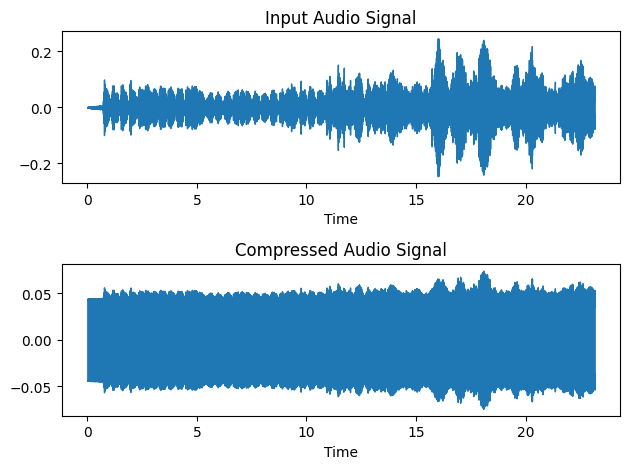

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf

class Compressor:
    def __init__(self, threshold, ratio, attack, release, fs, N):
        self.threshold = threshold
        self.ratio = ratio
        self.attack = attack
        self.release = release
        self.fs = fs
        self.N = N
        self.gain = 0
        self.x_buffer = np.zeros(N)

    def update_gain(self, x):
        abs_x = np.abs(x)
        if abs_x > self.threshold:
            increment = -1/self.attack if x > 0 else 1/self.release
            self.gain += increment / self.fs
            if self.gain > 0:
                self.gain = 0
        else:
            self.gain = 0

    def compress(self, x):
        self.x_buffer[:-1] = self.x_buffer[1:]
        self.x_buffer[-1] = x
        mean_x = np.mean(np.abs(self.x_buffer))
        self.update_gain(mean_x)
        y = self.threshold + ((x - self.threshold) / self.ratio * np.power(10, self.gain/20))
        return y

compressor = Compressor(threshold=0.05, ratio=8, attack=20, release=40, fs=44100, N=10)
audio_file = r'C:\Users\golja\Desktop\file\music.wav'

audio_signal, sr = librosa.load(audio_file, sr=441)
output_signal = [compressor.compress(x) for x in audio_signal]
sf.write('compressed_audio.wav', np.array(output_signal), sr)

plt.figure()
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_signal, sr=sr)
plt.title('Input Audio Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.array(output_signal), sr=sr)
plt.title('Compressed Audio Signal')

plt.tight_layout()
plt.show()


## sinc as input

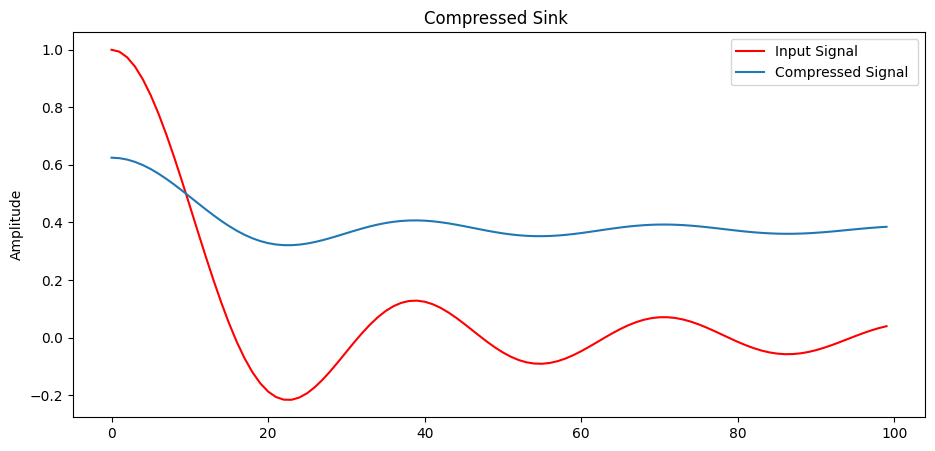

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def sink_wave(t):
    return np.sinc(t)

class Compressor:
    def __init__(self, threshold, ratio, attack, release, fs, N):
        self.threshold = threshold
        self.ratio = ratio
        self.attack = attack
        self.release = release
        self.fs = fs
        self.N = N
        self.gain = 0
        self.x_buffer = np.zeros(N)

    def update_gain(self, x):
        abs_x = np.abs(x)
        if abs_x > self.threshold:
            increment = -1/self.attack if x > 0 else 1/self.release
            self.gain += increment / self.fs
            if self.gain > 0:
                self.gain = 0
        else:
            self.gain = 0

    def compress(self, x):
        self.x_buffer[:-1] = self.x_buffer[1:]
        self.x_buffer[-1] = x
        mean_x = np.mean(np.abs(self.x_buffer))
        self.update_gain(mean_x)
        y = self.threshold + ((x - self.threshold) / self.ratio * np.power(10, self.gain/20))
        return y

compressor = Compressor(threshold=0.5, ratio=4, attack=10, release=20, fs=1000, N=10)

input_signal = sink_wave(np.linspace(0, 2*np.pi, 100))
output_signal = [compressor.compress(x) for x in input_signal]

plt.figure(figsize=(11, 5))
plt.plot(input_signal, label='Input Signal ',color='red')
plt.plot(output_signal, label='Compressed Signal ')
plt.ylabel('Amplitude')
plt.title('Compressed Sink ')
plt.legend()
plt.show()

## 2-3-3

## Delay

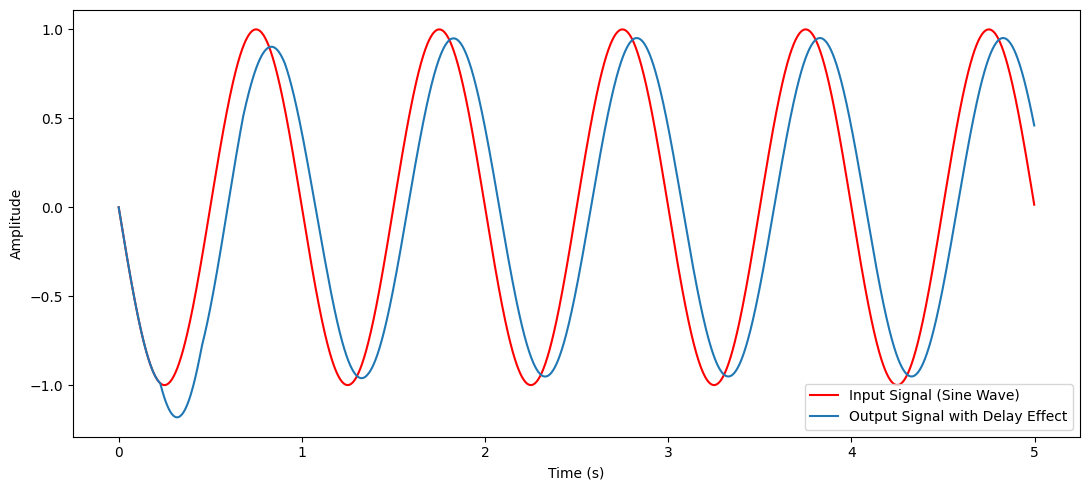

In [36]:
import numpy as np

def apply_delay_effect(signal, delay_samples, feedback_gain):
    output_signal = np.zeros_like(signal)
    
    for i in range(len(signal)):
        if i - delay_samples >= 0:
            output_signal[i] = signal[i] + feedback_gain * output_signal[i - delay_samples]
        else:
            output_signal[i] = signal[i]
    
    return output_signal

delay_samples = 100  
feedback_gain = 0.5  
fs = 441  
duration = 5  
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
input_signal = np.sin(2 * np.pi * 440 * t)  
output_signal = apply_delay_effect(input_signal, delay_samples, feedback_gain)
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 5))
plt.plot(t, input_signal, label='Input Signal (Sine Wave)',color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.plot(t, output_signal, label='Output Signal with Delay Effect')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

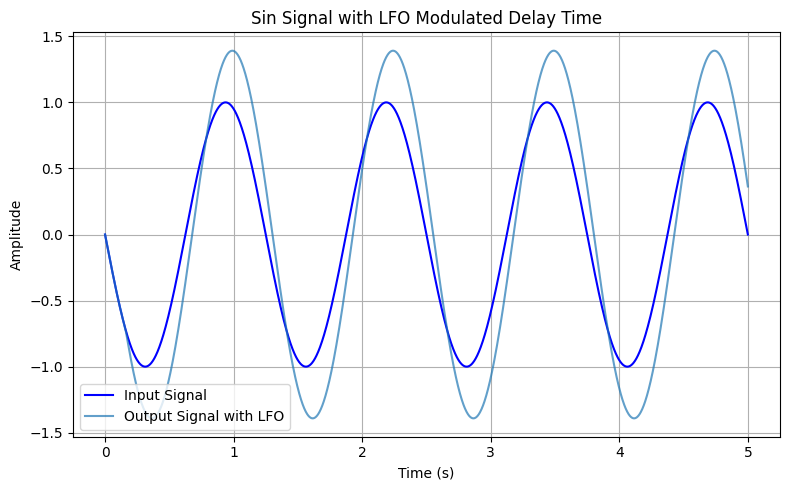

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fs = 441
n = 50
cutoff_freq = 20
delay_gain = 0.5
duration = 5
t = np.linspace(0, duration, int(fs * duration))
input_signal = np.sin(2 * np.pi * 440 * t)
lfo_freq = 0.7 
lfo_amplitude = 20  
lfo_signal = lfo_amplitude * np.sin(2 * np.pi * lfo_freq * t)
delay_time = n + lfo_signal

def apply_delay_vcf_echo_lfo(input_signal, delay_time, cutoff_freq, fs, delay_gain):
    output_signal = np.zeros_like(input_signal)
    delay_signal = np.concatenate((np.zeros(int(max(delay_time))), input_signal[:-int(max(delay_time))])) * delay_gain
    RC = 1/(2*np.pi*cutoff_freq)
    alpha = 1/(RC*fs)
    filtered_delay_signal = np.zeros_like(delay_signal)
    for i in range(1, len(delay_signal)):
        filtered_delay_signal[i] = alpha*delay_signal[i] + (1-alpha)*filtered_delay_signal[i-1]

    output_signal = input_signal + filtered_delay_signal
    return output_signal

output_signal_lfo = apply_delay_vcf_echo_lfo(input_signal, delay_time, cutoff_freq, fs, delay_gain)

plt.figure(figsize=(8, 5))
plt.plot(t, input_signal, label='Input Signal', color='blue')
plt.plot(t, output_signal_lfo, label='Output Signal with LFO',  alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sin Signal with LFO Modulated Delay Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import soundfile as sf

def apply_delay_effect(signal, delay_samples, feedback_gain):
    output_signal = np.zeros_like(signal)
    
    for i in range(len(signal)):
        if i - delay_samples >= 0:
            output_signal[i] = signal[i] + feedback_gain * output_signal[i - delay_samples]
        else:
            output_signal[i] = signal[i]
    
    return output_signal

delay_samples = 10000
feedback_gain = 0.5
fs = 441

# Load your music file
input_signal, fs = sf.read(r'C:\Users\golja\Desktop\file\music.wav')

output_signal = apply_delay_effect(input_signal, delay_samples, feedback_gain)

# Play the delayed music
import sounddevice as sd
sd.play(output_signal, fs)

# Alternatively, you can save the delayed music to a WAV file
sf.write(r'C:\Users\golja\Desktop\file\music_delay.wav', output_signal, fs)

## Phaser effect

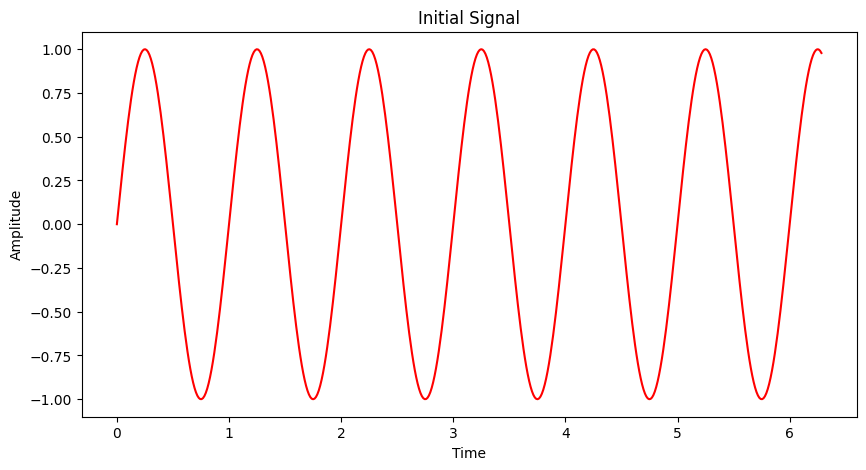

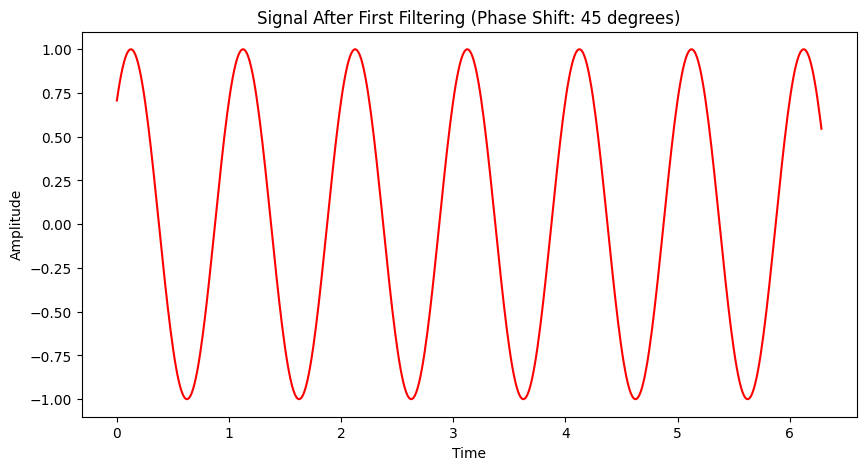

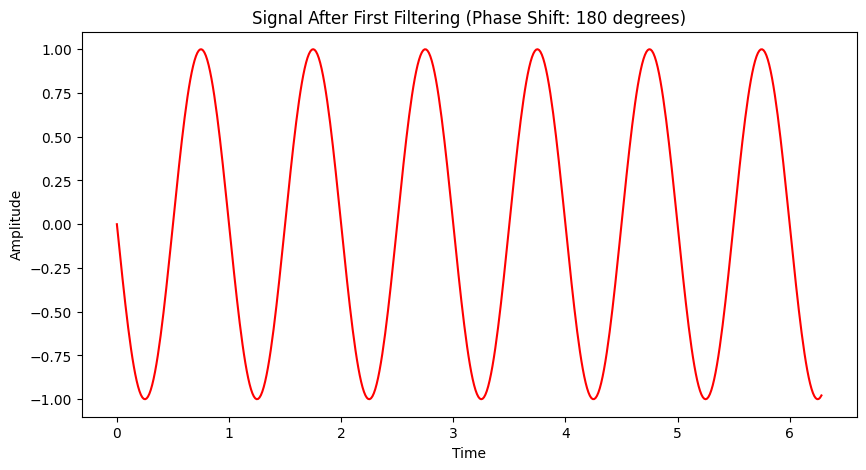

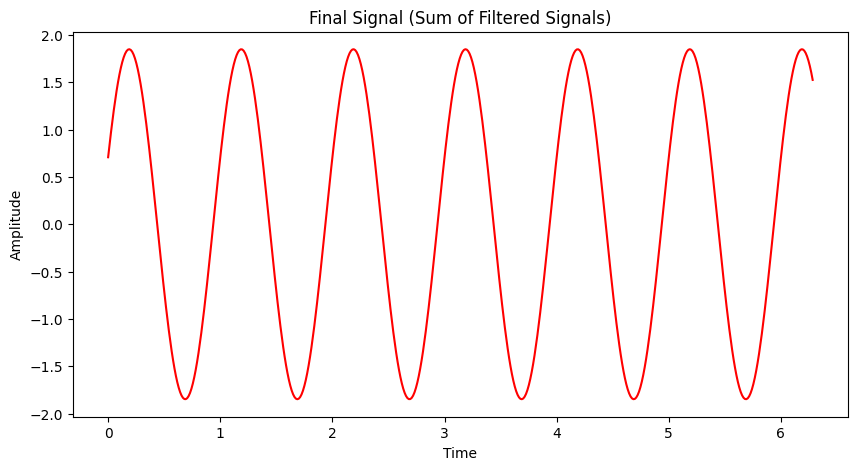

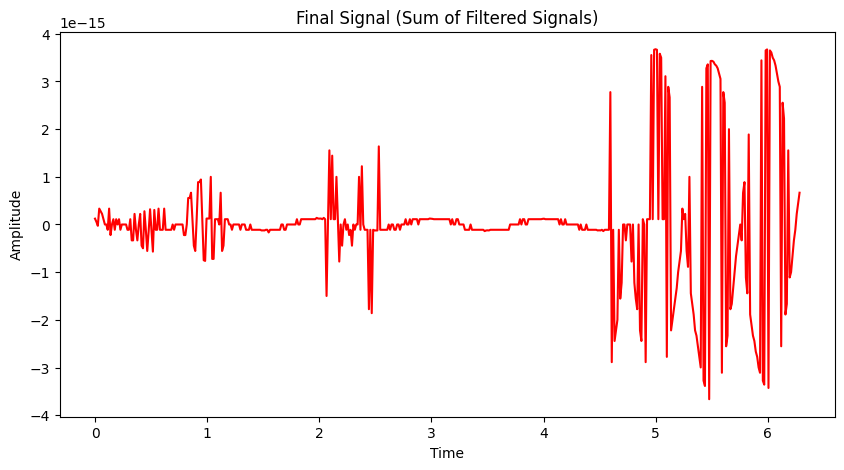

In [33]:
import numpy as np
import matplotlib.pyplot as plt


freq = 440  
phase = 0  

t = np.linspace(0, 2*np.pi, 500)
A = 1
f = 1
phase = 0
sin_wave= A * np.sin(2 * np.pi * f * t + phase)
new_phase1 = np.pi/4   
phase_shifted_sin_wave = np.sin(2 * np.pi * f * t + new_phase1)

new_phase2=np.pi
phase_shifted_sin_wave1= np.sin(2 * np.pi * f * t + new_phase2)
final_signal1 = sin_wave + phase_shifted_sin_wave
final_signal2 = sin_wave + phase_shifted_sin_wave1

plt.figure(figsize=(10, 5))
plt.plot(t, sin_wave,color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Initial Signal')

plt.figure(figsize=(10, 5))
plt.plot(t, phase_shifted_sin_wave,color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal After First Filtering (Phase Shift: 45 degrees)')

plt.figure(figsize=(10, 5))
plt.plot(t, phase_shifted_sin_wave1,color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal After First Filtering (Phase Shift: 180 degrees)')

plt.figure(figsize=(10, 5))
plt.plot(t, final_signal1,color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Final Signal (Sum of Filtered Signals)')

plt.figure(figsize=(10, 5))
plt.plot(t, final_signal2,color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Final Signal (Sum of Filtered Signals)')

plt.show()

# 2. 3. 5  Flanger

In [77]:
import soundfile as sf
import numpy as np
from scipy import signal
import scipy.io.wavfile as wav
from scipy.signal import chirp, sweep_poly

In [78]:

def feedback_modulated_delay(data, modwave, dry, wet):
    out = data.copy()
    for i in range(len(data)):
        index = int(i - modwave[i])
        if index >= 0 and index < len(data):
            out[i] = out[i] * dry + out[index] * wet
    return out

def flanger(data, freq, dry=0.5, wet=0.5, depth=20.0, delay=1.0, rate=44100):
    length = float(len(data)) / rate
    mil = float(rate) / 1000
    delay *= mil
    depth *= mil
    modwave = (np.sin(2 * np.pi * freq * np.linspace(0, length, len(data))) / 2 + 0.5) * depth + delay
    return feedback_modulated_delay(data, modwave, dry, wet)


input_file_path = r'C:\Users\golja\Desktop\file\Electric.wav'
rate, data = wav.read(input_file_path)

data_with_flanger = flanger(data, freq=3.14159)

output_file_path = r'C:\Users\golja\Desktop\file\ElectricFlanger.wav'
wav.write(output_file_path, rate, np.int16(data_with_flanger))


In [79]:


def feedback_modulated_delay(data, modwave, dry, wet):
    out = data.copy()
    for i in range(len(data)):
        index = int(i - modwave[i])
        if index >= 0 and index < len(data):
            out[i] = out[i] * dry + out[index] * wet
    return out

def flanger(data, freq, dry=0.5, wet=0.5, depth=20.0, delay=1.0, rate=44100):
    length = float(len(data)) / rate
    mil = float(rate) / 1000
    delay *= mil
    depth *= mil
    modwave = (np.sin(2 * np.pi * freq * np.linspace(0, length, len(data))) / 2 + 0.5) * depth + delay
    return feedback_modulated_delay(data, modwave, dry, wet)

input_file_path = r'C:\Users\golja\Desktop\file\Talk.wav'
rate, data = wav.read(input_file_path)

data_with_flanger = flanger(data, freq=3.14159)

output_file_path = r'C:\Users\golja\Desktop\file\TalkFlanger.wav'
wav.write(output_file_path, rate, np.int16(data_with_flanger))


# 2. 3. 6  Chorus

In [80]:



def modulated_delay(data, modwave, dry, wet):
 
    out = data.copy()
    for i in range(len(data)):
        index = int(i - modwave[i])
        if index >= 0 and index < len(data):
            out[i] = data[i] * dry + data[index] * wet
    return out
def chorus(data, freq, dry=0.5, wet=0.5, depth=5.0, delay=25.0, rate=44100):
    length = float(len(data)) / rate
    mil = float(rate) / 1000
    delay *= mil
    depth *= mil
    t = np.linspace(0.0, length, len(data), endpoint=False)
    modwave = (np.sin(2 * np.pi * freq * t) / 2 + 0.5) * depth + delay
    return modulated_delay(data, modwave, dry, wet)


input_file_path = r'C:\Users\golja\Desktop\file\Talk.wav'
rate, data = wav.read(input_file_path)

data_with_chorus = chorus(data, freq=3.14159/2)

output_file_path = r'C:\Users\golja\Desktop\file\talkWithChorus.WAV'
wav.write(output_file_path, rate, np.int16(data_with_chorus))


In [81]:


def modulated_delay(data, modwave, dry, wet):
 
    out = data.copy()
    for i in range(len(data)):
        index = int(i - modwave[i])
        if index >= 0 and index < len(data):
            out[i] = data[i] * dry + data[index] * wet
    return out
def chorus(data, freq, dry=0.5, wet=0.5, depth=5.0, delay=25.0, rate=44100):
    length = float(len(data)) / rate
    mil = float(rate) / 1000
    delay *= mil
    depth *= mil
    t = np.linspace(0.0, length, len(data), endpoint=False)
    modwave = (np.sin(2 * np.pi * freq * t) / 2 + 0.5) * depth + delay
    return modulated_delay(data, modwave, dry, wet)


input_file_path = r'C:\Users\golja\Desktop\file\Electric.wav'
rate, data = wav.read(input_file_path)

data_with_chorus = chorus(data, freq=3.14159/2)

output_file_path = r'C:\Users\golja\Desktop\file\ElectricWithChorus.WAV'
wav.write(output_file_path, rate, np.int16(data_with_chorus))


# 2. 3. 7  Reverberation

In [82]:
rir, sample_rate = sf.read(r'C:\Users\golja\Desktop\file\Room1.wav')
rir = rir[int(sample_rate * 1.01):int(sample_rate * 1.3)]
rir = rir / np.linalg.norm(rir, 2)

speech, _ = sf.read(r'C:\Users\golja\Desktop\file\Electric.wav')

speech_with_reverb = signal.fftconvolve(speech, rir, mode='full')

sf.write(r'C:\Users\golja\Desktop\file\ElectricInRoom1Reverb.WAV', speech_with_reverb, sample_rate)


## 2. 3. 8

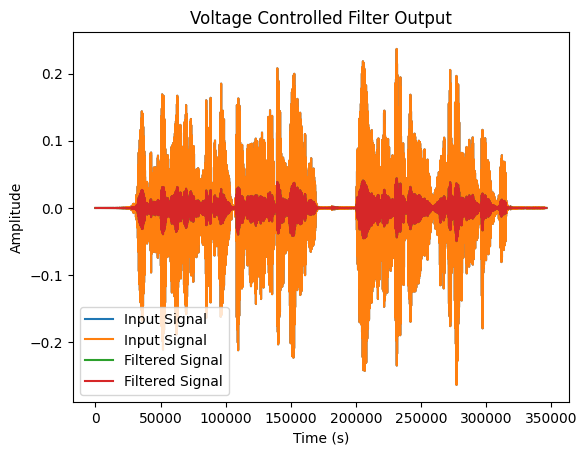

In [10]:
import numpy as np
from scipy.signal import lfilter
import soundfile as sf

class VoltageControlledFilter:
    def __init__(self, fs):
        self.fs = fs
        self.g = 0.5
        self.y_prev = 0

    def update(self, x, cutoff, resonance):
        f0 = 2 * cutoff / self.fs
        damping = 2 * resonance
        g = np.tan(np.pi * f0)
        h = 1 / (1 + g * (g + damping))

        y = h * (x - self.y_prev + g * (1 + g) * self.y_prev)
        self.y_prev = y
        return self.g * y

fs = 441
cutoff_frequency = 500
resonance = 0.8

vcf = VoltageControlledFilter(fs)

# Read input audio file
input_signal, fs = sf.read(r'C:\Users\golja\Desktop\file\music1.wav')

# Apply the filter to the audio data
filtered_signal = np.array([vcf.update(xi, cutoff_frequency, resonance) for xi in input_signal])

# Write the filtered signal to a new audio file
sf.write("Voltage_Controlled_Filter.wav", filtered_signal, fs)

# Plot the filtered signal if needed
plt.plot(input_signal, label='Input Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Voltage Controlled Filter Output')
plt.legend()
plt.show()

## 2. 3. 9 Voice Encoder


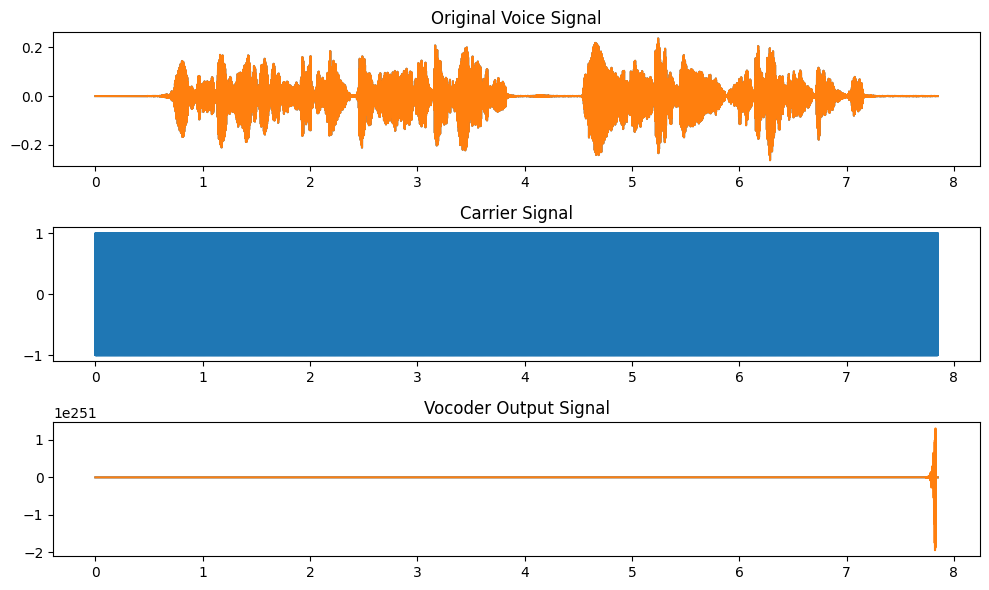

In [32]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Get input parameters from the user
fs = 26100  # Assuming standard audio sampling rate
n_bands = 20
f_low = 100
f_high = 8000  # Typical voice frequency range

# Load voice signal from a WAV file
voice_signal, fs_voice = sf.read(r'C:\Users\golja\Desktop\file\music1.wav')

# Generate a carrier signal (sine wave) based on the voice signal length
t = np.linspace(0, len(voice_signal) / fs_voice, len(voice_signal), endpoint=False)
carrier_signal = np.sin(2 * np.pi * 1000 * t)  # Use your desired carrier frequency

# Define frequency band limits
band_limits = np.logspace(np.log10(f_low), np.log10(f_high), n_bands + 1)

# Filter both voice and carrier signals in each band
filtered_voice = []
filtered_carrier = []

for i in range(n_bands):
    low_cutoff = band_limits[i]
    high_cutoff = band_limits[i + 1]
    b, a = signal.butter(4, [low_cutoff, high_cutoff], fs=fs, btype='band')
    filtered_voice.append(signal.lfilter(b, a, voice_signal))
    filtered_carrier.append(signal.lfilter(b, a, carrier_signal))

# Perform modulation in each band
# Perform modulation in each band
modulated_bands = []
for i in range(n_bands):
    # Modulate the carrier signal with each channel of the filtered voice
    modulated_band_channel1 = filtered_carrier[i][:len(filtered_voice[i])] * filtered_voice[i][:, 0]
    modulated_band_channel2 = filtered_carrier[i][:len(filtered_voice[i])] * filtered_voice[i][:, 1]
    modulated_bands.append(np.stack((modulated_band_channel1, modulated_band_channel2), axis=1))

# Recombine modulated bands 
output_signal = np.sum(modulated_bands, axis=0)

# Ensure the output signal length matches the input signal length
if len(output_signal) < len(voice_signal):
    output_signal = np.pad(output_signal, (0, len(voice_signal) - len(output_signal)), 'constant')
elif len(output_signal) > len(voice_signal):
    output_signal = output_signal[:len(voice_signal)]

# Plot the original voice, carrier, and output signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, voice_signal)
plt.title('Original Voice Signal')
plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal[:len(voice_signal)])
plt.title('Carrier Signal')
plt.subplot(3, 1, 3)
plt.plot(t, output_signal)
plt.title('Vocoder Output Signal')
plt.tight_layout()
plt.show()

# Save the output signal as a WAV file
sf.write('vocoder_output.wav', output_signal, fs)

## 2. 3. 10 pitch shifter

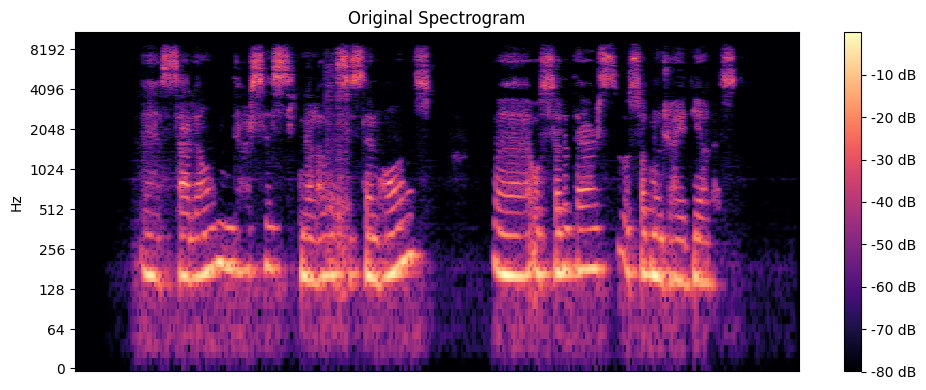

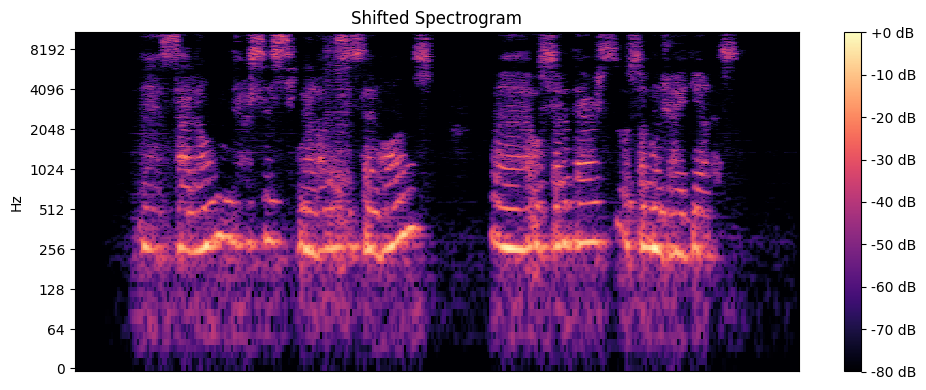

Pitch-shifted audio file saved as: C:\Users\golja\Desktop\file\music1_shifted.wav


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf

def pitch_shift_and_visualize(audio_file, semitones):
    audio_signal, sampling_rate = librosa.load(audio_file)

    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_signal)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', sr=sampling_rate, hop_length=512)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Original Spectrogram')
    plt.tight_layout()
    plt.show()

    shifted_audio = librosa.effects.pitch_shift(audio_signal, sr=sampling_rate, n_steps=semitones)

    plt.figure(figsize=(10, 4))
    D_shifted = librosa.amplitude_to_db(np.abs(librosa.stft(shifted_audio)), ref=np.max)
    librosa.display.specshow(D_shifted, y_axis='log', sr=sampling_rate, hop_length=512)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Shifted Spectrogram')
    plt.tight_layout()
    plt.show()
    output_file = audio_file.replace('.wav', '_shifted.wav')
    sf.write(output_file, shifted_audio, sampling_rate)
    return output_file

audio_file = r'C:\Users\golja\Desktop\file\music1.wav'
semitones = 8
output_file = pitch_shift_and_visualize(audio_file, semitones)
print("Pitch-shifted audio file saved as:", output_file)